# Input data for BEV program
This script prepares the input data from the calculation of the LCA of the Replace and Retire program. 

In [698]:
%run initialize_notebook.ipynb
plt.style.use('seaborn')

### Data for size and number of cars on county level for the cities affected by driving bans 

Import the data from KBA (fz1) on county level from https://www.kba.de/DE/Statistik/Fahrzeuge/Bestand/ZulassungsbezirkeGemeinden/zulassungsbezirke_node.html

Use this data and calculate the number of diesel (and potential petrol cars) affected by a driving ban limited to euro 5 or euro 4. Calculate the size distribution in each of these cities afterwards. 


The list of cities with excedance of the NO2-limits is available from: https://www.umweltbundesamt.de/sites/default/files/medien/2546/dokumente/no2-ueberschreitungen_staedte_stand_18.01.2019.pdf 

Importing the KBA data and create dataframes: 

In [699]:
path = "./data/raw data/Replace and Retire/fz1_2019.xlsx"

#Number of cars by powertrain
df = pd.read_excel(path, sheet_name = 'Pkw', skiprows = 6, header = 2)
#Number of cars by motor size 
df_size = pd.read_excel(path, sheet_name = 'Kfz_u_Kfz_Anh', skiprows = 8)
df_size = df_size[['Statistische Kennziffer und Zulassungsbezirk', 'Hubraum\nbis \n1.399 cm³', '1.400\nbis\n1.999 cm³', '2.000\nund\nmehr cm³','unbe-\nkannt '    ]].iloc[0:444,:]

#List of cities with potential driving bans/exceeding NO2 limits
df_cities = pd.read_excel("./data/raw data/Replace and Retire/Cities_driving_bans.xlsx", sheet_name = 'Modified list')

In [700]:
#Dataframe with total number of cars by powertrain in each county
df_tot = df[['Statistische Kennziffer und Zulassungsbezirk', 'Insgesamt', 'Benzin',
       'Diesel', 'Hybrid \ninsgesamt',
       'darunter Hybrid mit \nPlug-in', 'Elektro', 'sonstige']].iloc[0:444,:]

#Dataframe with total number of petrol cars in each county 
df_petrol = df[['Statistische Kennziffer und Zulassungsbezirk','Euro 1',
       'Euro 2', 'Euro 3', 'Euro 4', 'Euro 5', 'Euro 6', 'darunter\nEuro 6d',
       'darunter\nEuro 6d-temp', 'sonstige.1',
       'schadstoff-\nreduzierte \ninsgesamt']].iloc[0:444,:]
#df_petrol.set_index('Statistische Kennziffer und Zulassungsbezirk', inplace = True)

#Dataframe with total number of diesel cars in each county 
df_diesel = df[['Statistische Kennziffer und Zulassungsbezirk','Euro 1.1', 'Euro 2.1',
       'Euro 3.1', 'Euro 4.1', 'Euro 5.1', 'Euro 6.1', 'darunter\nEuro 6d.1',
       'darunter\nEuro 6d-temp.1', 'sonstige.2',
       'schadstoffred.\nmit Diesel-\nantrieb insgesamt' ]].iloc[0:444,:]
#set_index here?

Some code to be able to match the list of cities (with NO2 exceedances) in with the cities of the KBA data: 

In [701]:
cities = df_cities.iloc[:,0].to_list()

In [702]:
i = 0
store_list = list()
modified_list = list()
for row, index in df_tot.iterrows(): 
    for city in cities:
         if city.upper() in str(index[0]):
                modified_list.append(str(index[0]))
                store_list.append(city)
        
           

In [703]:
#These cities are not found, need to check for consistency 
missing = (list(set(cities)-set(store_list)))

In [704]:
for row, index in df_tot.iterrows(): 
    for city in missing: 
        if (city.split()[0]) in str(index[0]): 
            modified_list.append(str(index[0]))
            store_list.append(city)

These cities are not found in the data from KBA fz1 (so do not consider them for now): 

In [705]:
(list(set(cities)-set(store_list)))

['Leinfelden-Echterdingen', 'Pleidelsheim', 'Walzbachtal', 'Leonberg']

In [706]:
#Some of the citites are removed from the dataframe as they both are cities and regions
modified_list.remove('08125  HEILBRONN                   ')
modified_list.remove('09772  AUGSBURG                    ')
modified_list.remove('06531  GIESSEN                     ')
modified_list.remove('07339  MAINZ-BINGEN                ')
modified_list.remove('14729  LEIPZIG                     ')
modified_list.remove('07137  MAYEN-KOBLENZ               ')

 


List of the 59 citites with driving bans found in fz1:
-  from the 2019 updated list there are 67 cities 
-  remove the 4 that is green (NO2 values under limit) so far 
-  4 cities not found in fz1

In [707]:
modified_list

['08111  STUTTGART,STADT             ',
 '08116  ESSLINGEN                   ',
 '08118  LUDWIGSBURG                 ',
 '08121  HEILBRONN,STADT             ',
 '08222  MANNHEIM,STADT              ',
 '08415  REUTLINGEN                  ',
 '09761  AUGSBURG,STADT              ',
 '11000  BERLIN                    ',
 '02000  HAMBURG                     ',
 '06411  DARMSTADT,STADT             ',
 '06412  FRANKFURT AM MAIN,STADT     ',
 '06413  OFFENBACH AM MAIN,STADT     ',
 '06414  WIESBADEN,STADT             ',
 '06531  GIESSEN                     ',
 '03241  HANNOVER                    ',
 '03254  HILDESHEIM                  ',
 '03458  OLDENBURG(OLDENBURG)        ',
 '03459  OSNABRUECK                  ',
 '05111  DUESSELDORF, STADT          ',
 '05112  DUISBURG,STADT              ',
 '05113  ESSEN,STADT                 ',
 '05116  MOENCHENGLADBACH,STADT      ',
 '05117  MUELHEIM A.D.RUHR,STADT     ',
 '05119  OBERHAUSEN,STADT            ',
 '05124  WUPPERTAL,STADT             ',
 '

Filter out only the cities affected by diesel bans from the dataframes of total cars and calculate the number of cars <= euro 5:

In [708]:
#Create dataframes only containing the relevant counties 
filter1 = df_diesel['Statistische Kennziffer und Zulassungsbezirk'].isin(modified_list)
diesel_ban = df_diesel[filter1]
petrol_ban = df_petrol[filter1]
size_ban = df_size[filter1]

#Setting index
size_ban.set_index('Statistische Kennziffer und Zulassungsbezirk', inplace = True)
diesel_ban.set_index('Statistische Kennziffer und Zulassungsbezirk', inplace = True)
petrol_ban.set_index('Statistische Kennziffer und Zulassungsbezirk', inplace = True)

The number of diesel cars <= euro 5 and <= euro 4 is: 

In [709]:
print(sum(diesel_ban.iloc[:,0:5].sum(axis =1)))
print(sum(diesel_ban.iloc[:,0:4].sum(axis =1)))



2575158.0
1237060.0


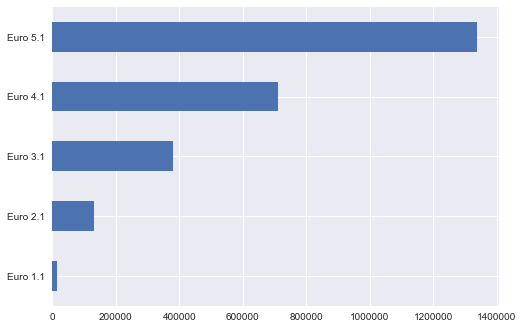

In [710]:
diesel_ban.iloc[:,0:5].sum(axis = 0).plot.barh(stacked = True)

In some of the cities also petrol cars less than euro 2 or/and euro 1 is considered. 
Calculate the number of these cars and the share of them compared to diesel cars older or equal to euro 5: 

In [711]:
print(sum(petrol_ban.iloc[:,0:2].sum(axis =1)))

print(sum(petrol_ban.iloc[:,0:2].sum(axis =1))/sum(diesel_ban.iloc[:,0:5].sum(axis =1)))

1122444.0
0.4358738376441368


Need the size distribution in each of the cities with potential driving bans. 
The differences in size distribution are quite large among the counties: 
-  lowest share of small vehicles in München (26 %) and highest in Bochum (43 %) 
- lowest share of medium vehicles in Oberhausn (44 %) and highest in Bonn (53 %)
- lowest share of large vehicles in Wittenberg (10 %) and highest in Stuttgart (23%)

In [712]:
size_dist = list()
for row, index in size_ban.iterrows(): 
    size_dist.append(index[0:3]/sum(index[0:3]))
size_dist = pd.concat(size_dist, axis = 1).T    
    #size_ban.set_index('Statistische Kennziffer und Zulassungsbezirk').iloc[:,1:4].sum(axis =1)

In [713]:
print(list(zip(size_dist.idxmin(), size_dist.min())))
print(list(zip(size_dist.idxmax(), size_dist.max())))

[('09162  MUENCHEN,STADT                   ', 0.26567474489089693), ('05119  OBERHAUSEN,STADT                 ', 0.44483982534653826), ('15091  WITTENBERG                       ', 0.10103133941047308)]
[('05911  BOCHUM,STADT                     ', 0.43003293285357075), ('05314  BONN,STADT                       ', 0.5319831986632179), ('08111  STUTTGART,STADT                  ', 0.2251357052172783)]


Creating a dataframe with the euro class and size distribution of the old  DIESEL cars. Have to assume the same size distribution across all emission concepts:

In [714]:
idx = 0
keys_size = list(size_dist.iloc[1,:].index)
df_list = list()
for row, index in diesel_ban.iloc[:,0:5].iterrows(): 
    temp = [index*size_dist.iloc[idx,:].values[i] for i in [0,1,2]]
    idx+=1
    df = pd.concat(temp, axis = 1, keys = keys_size)
    df_list.append(df)
df_old = pd.concat(df_list, keys = diesel_ban.index)

#Dataframe with number of diesel cars per emission concept and size class 
df_old.head(10)


Hubraum\nbis \n1.399 cm³  \
Statistische Kennziffer und Zulassungsbezirk                                      
08111  STUTTGART,STADT                       Euro 1.1                 45.196978   
                                             Euro 2.1                768.051283   
                                             Euro 3.1               2173.915188   
                                             Euro 4.1               3666.902216   
                                             Euro 5.1               7669.213586   
08115  BOEBLINGEN                            Euro 1.1                 72.581970   
                                             Euro 2.1                783.504931   
                                             Euro 3.1               2298.217741   
                                             Euro 4.1               4375.837006   
                                             Euro 5.1               8327.909412   

                                                       1.400\nbis\n1.999 cm³  \
Statistische Kennziffer und Zulassungsbezirk                                   
08111  STUTTGART,STADT                       Euro 1.1              72.582394   
                                             Euro 2.1            1233.423190   
                                             Euro 3.1            3491.117671   
                                             Euro 4.1            5888.724268   
                                             Euro 5.1           12316.086305   
08115  BOEBLINGEN                            Euro 1.1             108.882964   
                                             Euro 2.1            1175.365445   
                                             Euro 3.1            3447.643543   
                                             Euro 4.1            6564.358952   
                                             Euro 5.1           12493.012564   

                                                       2.000\nund\nmehr cm³  
Statistische Kennziffer und Zulassungsbezirk                                 
08111  STUTTGART,STADT                       Euro 1.1             34.220627  
                                             Euro 2.1            581.525527  
                                             Euro 3.1           1645.967141  
                                             Euro 4.1           2776.373517  
                                             Euro 5.1           5806.700109  
08115  BOEBLINGEN                            Euro 1.1             47.535066  
                                             Euro 2.1            513.129624  
                                             Euro 3.1           1505.138716  
                                             Euro 4.1           2865.804042  
                                             Euro 5.1           5454.078024

In [715]:
#Checking that the size distribution is the same as before REWRITE
index_list = list(df_old.groupby('Statistische Kennziffer und Zulassungsbezirk').sum().index)
df_size=pd.DataFrame([df_old.loc[index_list[i]].sum(axis = 0)/sum(df_old.loc[index_list[i]].sum(axis = 0)) for i in np.arange(len(index_list))]).set_index(size_dist.index)

#for row, index in df_check.iterrows(): 
 #   print(index)
  #  #df_size = df_size[['Statistische Kennziffer und Zulassungsbezirk', 'Hubraum\nbis \n1.399 cm³', '1.400\nbis\n1.999 cm³', '2.000\nund\nmehr cm³','unbe-\nkannt '    ]].iloc[0:444,:]





The program should be limited to less cars than 2 million (ref. program from 2009). Assume that all euro 4 cars will be involved and that the rest of the budget will be dedicated to some euro 5 cars: 

In [716]:
#Program limited to euro 4 and including some euro 5 for the rest of the budget
tot_cars_in_program = 2000000
share_euro5 = (tot_cars_in_program-sum(diesel_ban.iloc[:,0:4].sum(axis =1)))/(sum(diesel_ban.iloc[:,0:5].sum(axis =1))-sum(diesel_ban.iloc[:,0:4].sum(axis =1)))
for row, index in df_old.iterrows(): 
    if 'Euro 5.1' in row: 
        df_old.loc[row] = df_old.loc[row]*share_euro5
    #If one 
#    if 'Euro 4.1' in row: 
#        df_old.loc[row] = df_old.loc[row]*0
        
#Checking that the number is still equal to tot_cars_in_program
df_old.groupby('Statistische Kennziffer und Zulassungsbezirk').sum()
print(sum(df_old.sum()))

2000000.000000001


If I want to limit the program to only euro 4 cars or euro 3 this code can be used: 

In [717]:
#for row, index in df_old.iterrows(): 
#    if 'Euro 5.1' in row: 
#        df_old.loc[row] = df_old.loc[row]*0
#    if 'Euro 4.1' in row: 
#        df_old.loc[row] = df_old.loc[row]*0
        

Checking that the total number of cars from the dataframe diesel_ban equals the sum over all size classes 

In [718]:

for i in np.arange(0,len(diesel_ban)): 
    if (sum(df_old.xs(diesel_ban.index[i], level = 0).sum(axis = 1)) == diesel_ban.iloc[:,0:5].sum(axis =1)[i]):
        print(sum(df_old.xs(diesel_ban.index[i], level = 0).sum(axis = 1)) == diesel_ban.iloc[:,0:5].sum(axis =1)[i])
    else: 
        print(diesel_ban.index[i])

08111  STUTTGART,STADT             
08115  BOEBLINGEN                  
08116  ESSLINGEN                   
08118  LUDWIGSBURG                 
08119  REMS-MURR-KREIS             
08121  HEILBRONN,STADT             
08135  HEIDENHEIM                  
08222  MANNHEIM,STADT              
08236  ENZKREIS                    
08311  FREIBURG I.BREISG.STADT     
08415  REUTLINGEN                  
08416  TUEBINGEN                   
09162  MUENCHEN,STADT              
09564  NUERNBERG,STADT             
09761  AUGSBURG,STADT              
11000  BERLIN                    
02000  HAMBURG                     
06411  DARMSTADT,STADT             
06412  FRANKFURT AM MAIN,STADT     
06413  OFFENBACH AM MAIN,STADT     
06414  WIESBADEN,STADT             
06431  BERGSTRASSE                 
06531  GIESSEN                     
06533  LIMBURG-WEILBURG            
03241  HANNOVER                    
03254  HILDESHEIM                  
03458  OLDENBURG(OLDENBURG)        
03459  OSNABRUECK             

### Plotting the size and emission concepts in each county

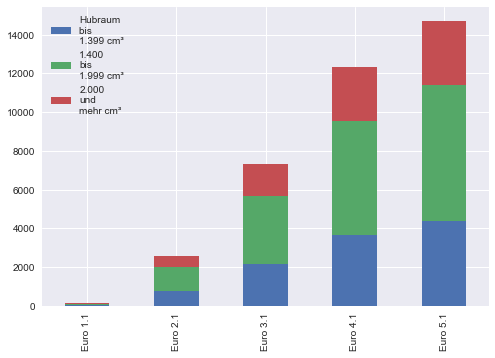

In [719]:
#Can plot distribution of emission concepts and size for each county like this 
df_old.xs('08111  STUTTGART,STADT             ', level = 0).plot(kind = 'bar', stacked = True)

[Text(0, 0.5, ''), Text(0.5, 0, 'number of vehicles')]

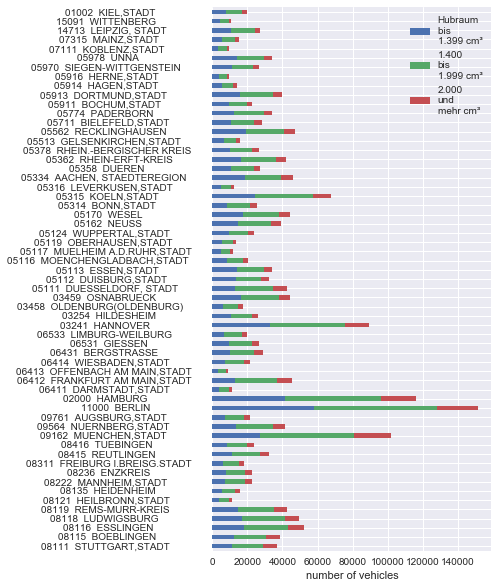

In [720]:
#Number of vehicles by size class
ax = df_old.sum(axis = 0, level = 0).plot.barh(stacked = True, figsize = [5,10])
ax.set(xlabel = 'number of vehicles', ylabel = '')

[Text(0, 0.5, ''), Text(0.5, 0, 'number of vehicles')]

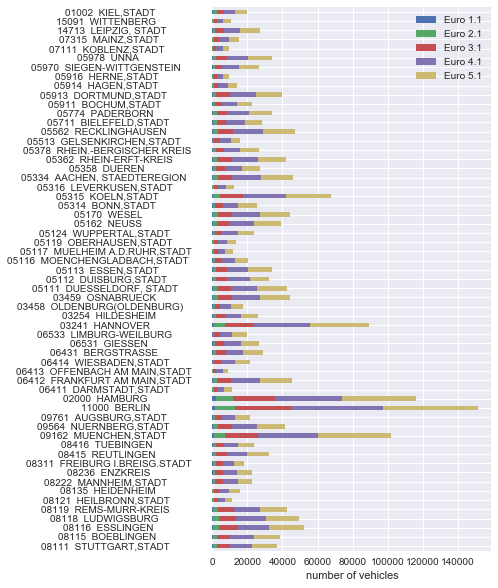

In [721]:
#Number of vehicles by euro class 
ax = df_old.sum(axis = 1).unstack().plot.barh(stacked = True, figsize = [5,10])
ax.set(xlabel = 'number of vehicles', ylabel = '')

## Analysing the size distribution of newly bought EV  

To determine the size distribution of the new EVs in the program, data from a report of EVs bought under the current subsidy program is used (available from: https://www.bafa.de/SharedDocs/Downloads/DE/Energie/emob_zwischenbilanz.pdf?__blob=publicationFile&v=43).

In addition the larger Teslas are accounted for (model X) (https://www.kba.de/DE/Statistik/Fahrzeuge/Neuzulassungen/MonatlicheNeuzulassungen/2018/2018_node.html, FZ10). 
The size classes are taken from the auto-umweltliste. 

As this data is available only for the Germany and not on county level it is assumed that the size distribution of the new EV cars are the same independent of the county (have seen from the data on the current stock that this may vary). 


In [722]:
df_size_dist = pd.read_excel("./data/raw data/Replace and Retire/emob_zwischenbilanz.xlsx", sheet_name = 'Only EV')

In [723]:
#Translating the EV vehicle sizes from auto-umweltliste etc. 
size_dict = {1: 'Mini', 2: 'Kleinwagen', 3: 'Untere Mittelklasse', 4: 'Mittelklasse', 5: 'Obere Mittelklasse', 6: 'Luxusklasse', 7: 'Sportswagen',  8: 'Cabriolet', 9: 'SUV', 10: 'Van', 11: 'Van' }
df_size_dist.replace({'Size class':size_dict}, inplace = True)
df_size_dist.head(7)

,Hersteller,Modell/Typ,Anzahl,Size class
0,BMW,i3,6817,Kleinwagen
1,BMW,i3 (120Ah),1449,Kleinwagen
2,BMW,i3s,1118,Kleinwagen
3,BMW,i3s (120Ah),995,Kleinwagen
4,Citroën,Berlingo Electric Kastenwagen L1 Business,213,Kastenwagen
5,Citroën,C-ZERO,154,Mini
6,Citroën,C-ZERO Modell 2017,136,Mini


In [724]:
#Grouping the BEVs sold by size classes 
df_size_dist = df_size_dist[['Size class','Anzahl']].groupby('Size class').sum()
df_size_dist

,Anzahl
Size class,
Cabriolet,30
Kastenwagen,355
Kleinwagen,24378
Lieferwagen,1115
Luxusklasse,5464
Medium,560
Mini,15678
Pritschenwagen,10
SUV,2996


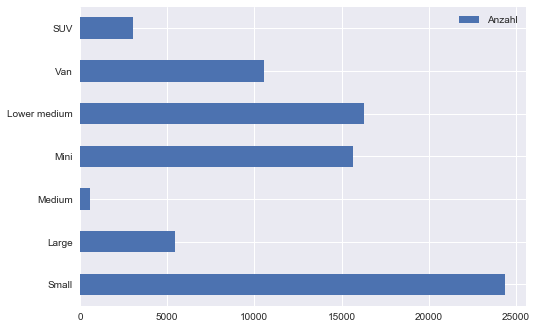

In [725]:
#Grouping into 7 PSI size classes (small, medium, large) 
df_size_dist = df_size_dist.append(df_size_dist.loc[['Lieferwagen', 'Kastenwagen', 'Pritschenwagen', 'Van']].sum(), 
                    ignore_index = True).drop([1,3,7,10])
df_size_dist.index = ['Cabriolet', 'Kleinwagen', 'Luxusklasse', 'Medium', 'Mini', 'SUV', 'Untere Mittelklasse', 'Van']

df_size_dist = df_size_dist.append(df_size_dist.loc[['Cabriolet', 'SUV']].sum(), 
                    ignore_index = True).drop([0,5])
df_size_dist.index = ['Kleinwagen', 'Luxusklasse', 'Medium', 'Mini', 'Untere Mittelklasse', 'Van', 'SUV']

#PSI size classes 
df_size_dist.index = ['Small', 'Large', 'Medium', 'Mini', 'Lower medium', 'Van', 'SUV']
df_size_dist.plot.barh(stacked = True) 

As the data on county level is available only for the rough motor division - aggregate the 7 "PSI" size classes into the motor size vehicles classes as used in HBEFA. The link between motor size and vehicle size is done based on some example cars (but can be discussed...): 

In [726]:
df_size_dist = df_size_dist.append(df_size_dist.loc[['Small', 'Mini']].sum(), 
                    ignore_index = True).drop([0,3])
df_size_dist.index = ['Large', 'Medium', 'Lower medium', 'Van', 'SUV', 'Small']

df_size_dist = df_size_dist.append(df_size_dist.loc[['Lower medium','Van', 'Medium']].sum(), ignore_index = True).drop([1,2,3])
df_size_dist.index = ['Large', 'SUV', 'Small', 'Medium']

df_size_dist = df_size_dist.append(df_size_dist.loc[['Large', 'SUV']].sum(), ignore_index = True).drop([0,1])
df_size_dist.index = ['Small', 'Medium', 'Large']

#Size distribution EV
size_share_EV = df_size_dist/df_size_dist.sum()
size_share_EV['Anzahl']


Small     0.527372
Medium    0.360850
Large     0.111778
Name: Anzahl, dtype: float64

As I only have data on the aggregated national level I need to adjust the size share of EVs in each county, as I know from the stock data that this will differ depending on the county. Compare the size distribution in each county to the average and adjust the EV share accordingly, this is done in size_share_EV. Then I multiply the shares with the total number of cars traded in in each county. 

In [727]:
#For the sizes of electric vehicles we only have the national average, so compare the size distribution in each county to the national average
df_size = pd.read_excel("./data/raw data/Replace and Retire/fz1_2019.xlsx", sheet_name = 'Kfz_u_Kfz_Anh', skiprows = 8)

df_rel_size_dist = pd.DataFrame(['Hubraum bis 1.399 cm³', '1.400 bis 1.999 cm³', '2.000 und mehr cm³'], [df_size.iloc[446][['Hubraum\nbis \n1.399 cm³', '1.400\nbis\n1.999 cm³','2.000\nund\nmehr cm³']].iloc[0], df_size.iloc[446][['Hubraum\nbis \n1.399 cm³', '1.400\nbis\n1.999 cm³','2.000\nund\nmehr cm³']].iloc[1], df_size.iloc[446][['Hubraum\nbis \n1.399 cm³', '1.400\nbis\n1.999 cm³','2.000\nund\nmehr cm³']].iloc[2]]).reset_index().set_index(0)
df_rel_size_dist = (df_rel_size_dist/df_rel_size_dist.sum(axis = 0)).T
df_rel_size_dist.index = ['average']
df_rel_size_dist.columns = size_dist.columns

#Want to see how the size distribution in each county compare to the national average in order to adjust the size distribution of the EV
EV_adjust_size_dist = size_dist/df_rel_size_dist.values
EV_adjust_size_dist

,Hubraum bis 1.399 cm³,1.400 bis 1.999 cm³,2.000 und mehr cm³
"08111 STUTTGART,STADT",0.818237,0.974297,1.536918
08115 BOEBLINGEN,0.872181,0.970126,1.417049
08116 ESSLINGEN,0.952808,0.981048,1.180485
08118 LUDWIGSBURG,0.942938,0.994373,1.160388
08119 REMS-MURR-KREIS,0.943814,0.981286,1.202000
"08121 HEILBRONN,STADT",0.907161,1.024033,1.149905
08135 HEIDENHEIM,0.935636,1.015701,1.107144
"08222 MANNHEIM,STADT",0.894783,1.029646,1.161832
08236 ENZKREIS,0.969497,0.979256,1.145080
08311 FREIBURG I.BREISG.STADT,0.889986,1.030235,1.171763


In [728]:
df = pd.concat([size_share_EV.T]*59, ignore_index = True)
df.index = EV_adjust_size_dist.index
df.columns = EV_adjust_size_dist.columns
size_share_EV = df*EV_adjust_size_dist

size_share_EV.columns = ['Small', 'Medium', 'Large']

#Need to normalize so the percentages sum to 1
size_share_EV = (size_share_EV/[size_share_EV.sum(axis = 1),size_share_EV.sum(axis = 1),size_share_EV.sum(axis = 1)])

In [729]:
size_share_EV.index = index_list
df_new = pd.concat([size_share_EV.loc[county]*sum(df_old.loc[county].sum()) for county in index_list], axis = 1).T
df_new.head(5)

,Small,Medium,Large
"08111 STUTTGART,STADT",16758.271159,13653.721289,6671.767878
08115 BOEBLINGEN,18399.498725,14003.516427,6336.136080
08116 ESSLINGEN,26515.957172,18681.078082,6963.101121
08118 LUDWIGSBURG,25066.455637,18087.092414,6538.124301
08119 REMS-MURR-KREIS,21375.080221,15206.404536,5769.866793


Confirm that this equals total number of cars (2 mill): 

In [730]:
sum(df_new.sum())

1999999.9999999995

In [731]:
#Checking that the total number of new cars equals the total number of old cars in each county 
assert(df_old.iloc[:,0:5].sum(axis =1).groupby('Statistische Kennziffer und Zulassungsbezirk').sum().values.round().any() ==df_new.sum(axis=1).values.round().any()), "The number of new and old cars in each county is not equal"

       

## Plotting size and euro distribution 

Size and euro distribution in different counties for the old diesel cars: 

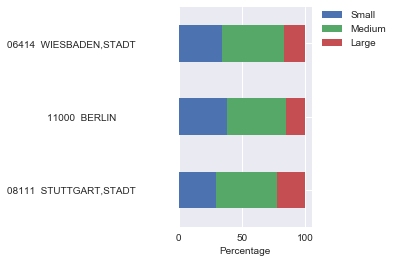

In [732]:
size_dist.index = index_list
df_plot = pd.concat([size_dist.loc[index_list[0]],size_dist.loc[index_list[15]],size_dist.loc[index_list[20]]], axis = 1)*100
df_plot.index = ['Small', 'Medium', 'Large']
ax = df_plot.T.plot.barh(stacked = True, figsize = [6,4] )
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 10)
ax.set_xlabel('Percentage', fontsize = 10)
plt.tight_layout()


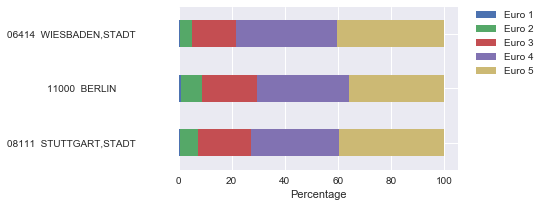

In [733]:

tst = pd.DataFrame([df_old.loc[index_list[i]].sum(axis = 1)/sum(df_old.loc[index_list[i]].sum(axis = 1)) for i in np.arange(len(index_list))])
tst.index = index_list
tst.columns = ['Euro 1', 'Euro 2', 'Euro 3', 'Euro 4', 'Euro 5']
df_plot=pd.concat([tst.loc[index_list[0]],tst.loc[index_list[15]],tst.loc[index_list[20]]], axis = 1)*100
ax =df_plot.T.plot.barh(stacked = True, figsize = [5,3])
ax.set_xlabel('Percentage')
#plt.tight_layout()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 10)
plt.savefig('euro distribution.svg', bbox_inches = 'tight')

Total number of vehicles exchanged are 2 million. 
The old are the diesel vehicles, new are the BEVs. See that we assume a downsizing effect, similar to the one observed in the 2009 program: 

<Figure size 72x72 with 0 Axes>

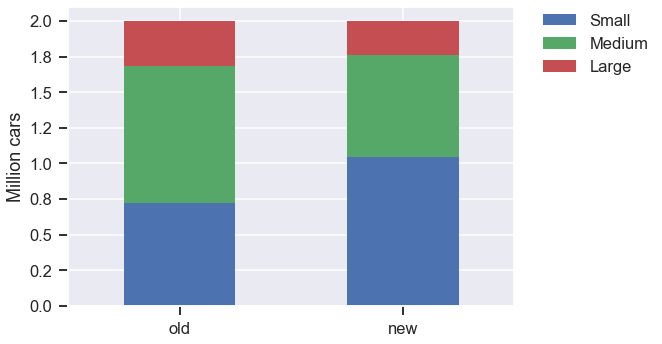

In [734]:
sns.set_context("talk")
plt.figure(figsize=(1,1))
df_old_plot = df_old.groupby('Statistische Kennziffer und Zulassungsbezirk').sum(axis = 1).sum()
df_old_plot.index = ['Small', 'Medium', 'Large']
ax = pd.concat([df_old_plot/1000000, df_new.sum()/1000000], keys= ['old', 'new']).unstack().plot.bar(stacked = True,rot = 0)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
ax.set_ylabel('Million cars')


from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


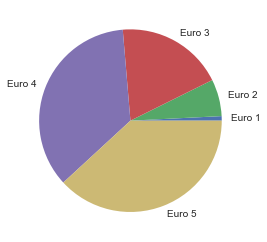

In [735]:
df_eurodist_plot = df_old.sum(axis = 1).reset_index().groupby('level_1').sum()
df_eurodist_plot.index = ['Euro 1', 'Euro 2', 'Euro 3', 'Euro 4', 'Euro 5']
df_eurodist_plot.columns = ['']
df_eurodist_plot.plot.pie(subplots = True, legend = None, figsize = [4,4], fontsize = 10)
plt.tight_layout()